In [14]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [15]:
with open("./results.json", "r") as file:
    result_file = json.loads(file.read())

In [16]:
import re
result_df = pd.json_normalize(result_file)
result_df.rename(columns=lambda c: re.sub(r'^simulation_results.', '', c), inplace=True)
result_df.rename(columns=lambda c: re.sub(r'^simulation_config.', '', c), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df

,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,controller_config.hidden_layer_size,...,campaign_config.testing_steps,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,campaign_config.concurrent_simulations,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards
0,1000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,3.0,0.3,0.301519,0.0555,"[0.0, 0.0158187134502924, 0.03972474737767091,..."
1,6000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,3.0,0.3,0.296416,0.0998,"[0.0, 0.005, 0.04305808071100424, 0.0592111816..."
2,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,3.0,0.3,0.288587,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474..."
3,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,3.0,0.3,0.294455,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474..."
4,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,3.0,0.3,0.297200,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,7000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,13.0,1.3,1.255735,0.0496,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0..."
2291,7000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,13.0,1.3,1.246019,0.0496,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0..."
2292,7000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,13.0,1.3,1.245612,0.0496,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0..."
2293,1000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,10000,1000000,5,True,True,13.0,1.3,1.271953,0.0248,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0..."


In [17]:
result_df.columns

Index(['completed_training_steps', 'controller',
       'controller_config.reward_function', 'controller_config.epsilon_start',
       'controller_config.epsilon_end', 'controller_config.learning_rate',
       'controller_config.gamma', 'controller_config.memory_size',
       'controller_config.batch_size', 'controller_config.hidden_layer_size',
       'controller_config.num_hidden_layers',
       'controller_config.target_network_update_rate',
       'controller_config.optimizing_rate', 'model_file', 'state',
       'mission_size', 'num_agents', 'sensor_generation_frequency',
       'sensor_generation_probability', 'sensor_packet_lifecycle',
       'simulation_steps', 'training', 'step_by_step', 'plots', 'verbose',
       'repetitions', 'campaign_config.training_steps',
       'campaign_config.testing_steps',
       'campaign_config.live_testing_frequency',
       'campaign_config.testing_repetitions',
       'campaign_config.concurrent_simulations',
       'campaign_config.concurrent

In [18]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,campaign_config.testing_steps,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,campaign_config.concurrent_simulations,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards
0,0,1000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,10000,1000000,5,True,True,3.0,0.3,0.301519,0.0555,"[0.0, 0.0158187134502924, 0.03972474737767091,..."
1,1,6000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,10000,1000000,5,True,True,3.0,0.3,0.296416,0.0998,"[0.0, 0.005, 0.04305808071100424, 0.0592111816..."
2,2,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,10000,1000000,5,True,True,3.0,0.3,0.288587,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474..."
3,3,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,10000,1000000,5,True,True,3.0,0.3,0.294455,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474..."
4,4,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,10000,1000000,5,True,True,3.0,0.3,0.297200,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474..."


In [19]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['completed_training_steps'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])
    result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

# Analysing Q Learning training performance

In [20]:
# Plot configurations
grid_row_column = 'mission_size'
grid_col_column = 'num_agents'
grid_hue_column = 'controller'

result_df

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,campaign_config.testing_repetitions,campaign_config.concurrent_simulations,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,maximum_simulation_steps,score
0,0,1000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.0,0.3,0.301519,0.0555,"[0.0, 0.0158187134502924, 0.03972474737767091,...",1000000,1.005065
1,1,6000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.0,0.3,0.296416,0.0998,"[0.0, 0.005, 0.04305808071100424, 0.0592111816...",6000000,0.988055
2,2,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.0,0.3,0.288587,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",5000000,0.961955
3,3,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.0,0.3,0.294455,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",5000000,0.981518
4,4,5000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.0,0.3,0.297200,0.1664,"[0.0, 0.005, 0.05762764269435934, 0.0895366474...",5000000,0.990665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,2290,7000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,13.0,1.3,1.255735,0.0496,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",7000000,0.965950
2291,2291,7000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,13.0,1.3,1.246019,0.0496,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",7000000,0.958476
2292,2292,7000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,13.0,1.3,1.245612,0.0496,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",7000000,0.958163
2293,2293,1000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,13.0,1.3,1.271953,0.0248,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00125, 0...",1000000,0.978425


In [21]:
q_learning_testing = result_df[~result_df['training']]

In [22]:
def grid_comparison_plot(df: pd.DataFrame, title: str, x: str, y: str):
    grid = sns.FacetGrid(df, row=grid_row_column, col=grid_col_column, aspect=2)



    if grid_hue_column is not None:
        unique_hue_values = df[grid_hue_column].nunique()
        grid.map_dataframe(sns.lineplot, x=x, y=y, hue=grid_hue_column, palette=sns.color_palette('Set2', n_colors=unique_hue_values))
    else:
        grid.map_dataframe(sns.lineplot, x=x, y=y)

    grid.add_legend()

    grid.fig.subplots_adjust(top=0.8)
    grid.fig.suptitle(title, fontsize=16)

    plt.tight_layout()

    plt.show()

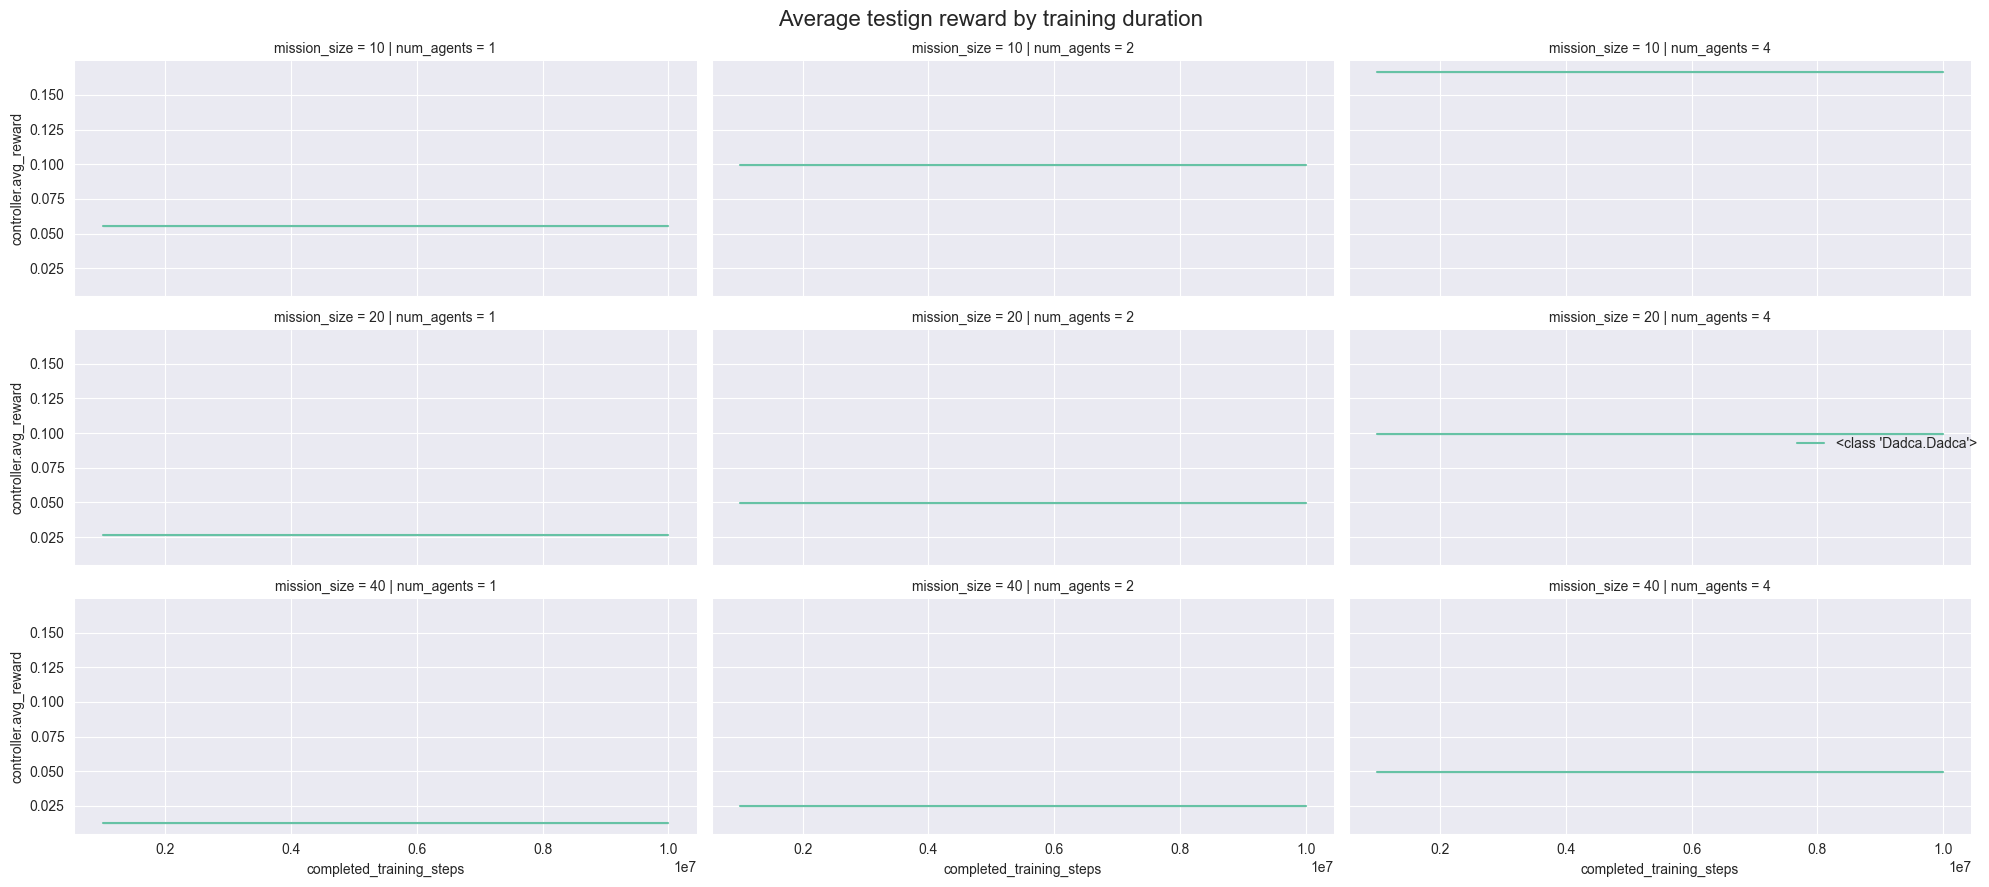

In [23]:
grid_comparison_plot(q_learning_testing, "Average testign reward by training duration", x='completed_training_steps', y='controller.avg_reward')

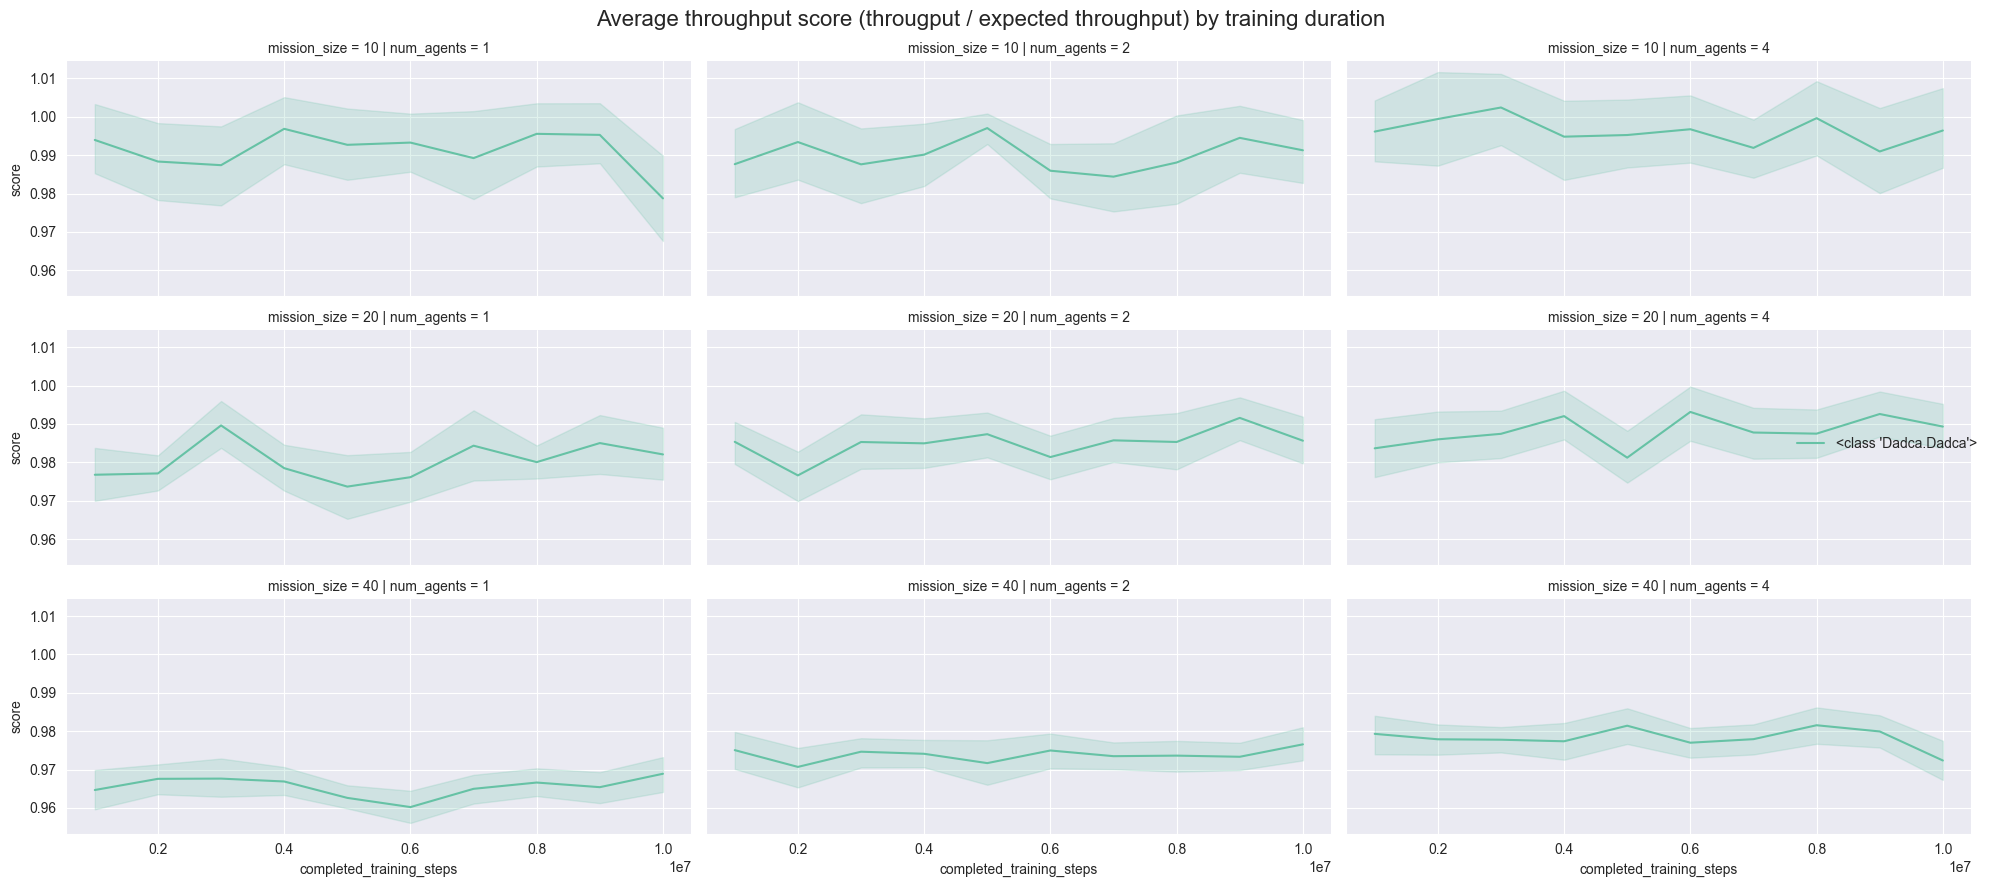

In [24]:
grid_comparison_plot(q_learning_testing, 'Average throughput score (througput / expected throughput) by training duration', x='completed_training_steps', y='score')

In [25]:
q_learning_training = result_df[result_df['training']]
q_learning_training

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,campaign_config.testing_repetitions,campaign_config.concurrent_simulations,campaign_config.concurrent_testing,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,maximum_simulation_steps,score
291,291,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.299778,0.055556,"[0.05516964626913891, 0.055522817122153775, 0....",10000000,0.999260
302,302,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.299983,0.100000,"[0.09890941044691293, 0.0998994991590375, 0.09...",10000000,0.999942
313,313,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.300141,0.055556,"[0.05516964626913891, 0.055522817122153775, 0....",10000000,1.000471
354,354,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.299763,0.055556,"[0.05516964626913891, 0.055522817122153775, 0....",10000000,0.999210
355,355,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.299932,0.100000,"[0.09890941044691293, 0.0998994991590375, 0.09...",10000000,0.999772
358,358,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.300143,0.166666,"[0.16463652384567146, 0.1664760550808014, 0.16...",10000000,1.000477
365,365,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.299572,0.100000,"[0.09890941044691293, 0.0998994991590375, 0.09...",10000000,0.998572
370,370,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.300095,0.166666,"[0.16463652384567146, 0.1664760550808014, 0.16...",10000000,1.000317
376,376,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.299762,0.166666,"[0.16463652384567146, 0.1664760550808014, 0.16...",10000000,0.999206
383,383,10000000,<class 'Dadca.Dadca'>,unique_packets,1,0.1,0.0005,0.99,10000,128,...,5,True,True,3.000000,0.300000,0.299878,0.166666,"[0.16463652384567146, 0.1664760550808014, 0.16...",10000000,0.999595


In [26]:
q_learning_training_exploded = q_learning_training.explode(['controller.cum_avg_rewards', 'controller.losses', 'controller.epsilons', 'controller.step_bins'])
q_learning_training_exploded.reset_index(names='step', inplace=True)
q_learning_training_exploded

KeyError: 'controller.losses'

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Cum. Avg. Reward by training step', x='controller.step_bins', y='controller.cum_avg_rewards')

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Loss by training step', x='controller.step_bins', y='controller.losses')

In [ ]:
grid_comparison_plot(q_learning_training_exploded, 'Epsilon by training step', x='controller.step_bins', y='controller.epsilons')